In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
level_crime_borough = pd.read_table('results/crime_level_boro.out',sep='\t', \
                            header=None,names=['Level','Borough','Count']) \
                            .sort_values(by='Count')

hlc = pd.read_table('results/crime_level_hour.out', \
                                  delimiter='\t',names=['Level','Hour','Count']) \
    
hourly_level_crime = hlc.loc[hlc['Hour']!=24.0].sort_values(by='Count')
    
wlc = pd.read_table('results/crime_level_day_of_week.out', \
                                    delimiter='\t',names=['Level','Day of Week','Count']) 

weekly_level_crime = wlc.loc[wlc['Day of Week']!=-1].sort_values(by='Count')
    
monthly_level_crime = pd.read_table('results/crime_level_month.out', \
                                    delimiter='\t',names=['Level','Month','Count']) \
                                    .sort_values(by='Count')
    
ylc = pd.read_table('results/crime_level_year.out', \
                   delimiter='\t',names=['Level','Year','Count'])

yearly_level_crime = ylc.loc[ylc['Year']>=2006].sort_values(by='Count')

## Level Crime by Boroughs

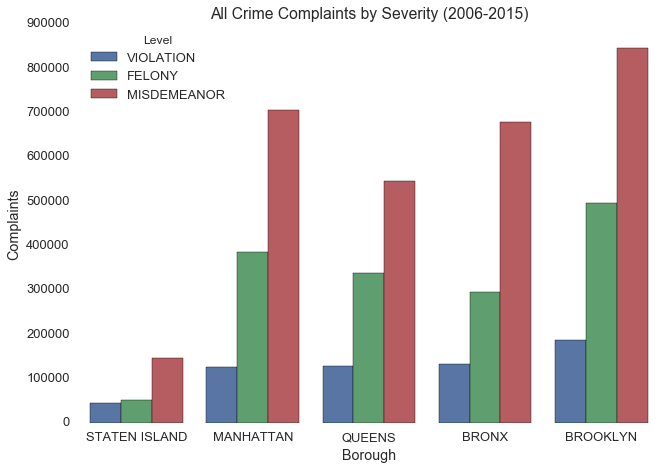

In [3]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
sns.barplot(x="Borough", y="Count", hue="Level", data=level_crime_borough, \
            hue_order=['VIOLATION','FELONY','MISDEMEANOR'])
sns.despine(bottom=True, left=True)
ax.set_ylabel('Complaints')
plt.title('All Crime Complaints by Severity (2006-2015)')

## Level Crime throughout the Day

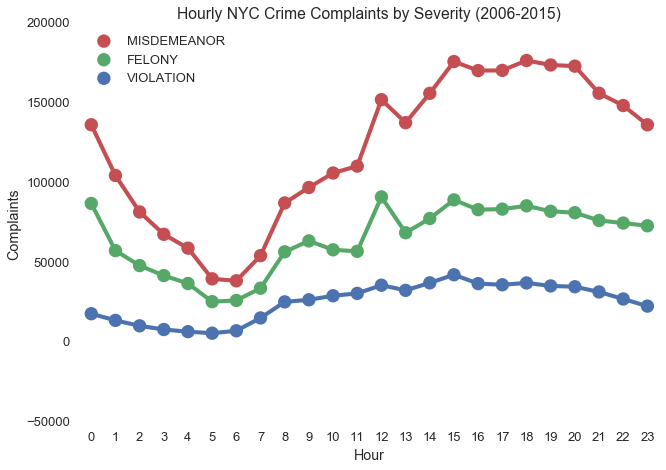

In [4]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
sns.pointplot(x="Hour", y="Count", hue="Level", data=hourly_level_crime)
ax.set_xticklabels(labels=list(range(24)))
sns.despine(bottom=True, left=True)
ax.set_ylabel('Complaints')
plt.title('Hourly NYC Crime Complaints by Severity (2006-2015)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='upper left')

## All Crime throughout the Week

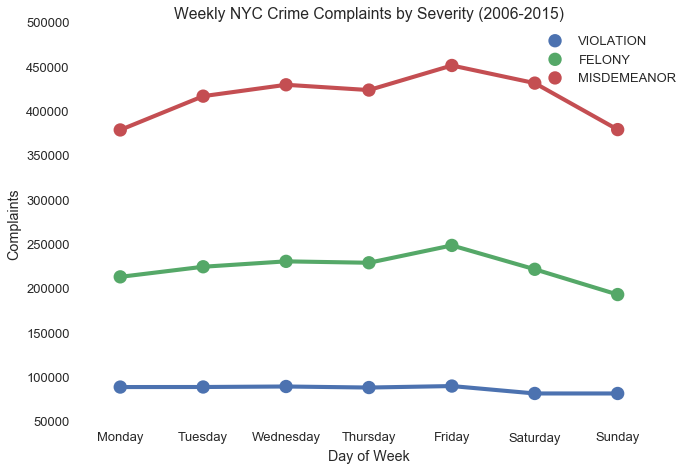

In [5]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
sns.pointplot(x="Day of Week", y="Count", hue="Level", data=weekly_level_crime)
ax.set_xticklabels(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.despine(bottom=True, left=True)
ax.set_ylabel('Complaints')
plt.title('Weekly NYC Crime Complaints by Severity (2006-2015)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
plt.legend(bbox_to_anchor=(1.05, 1))

## Level Crime throughout the Year

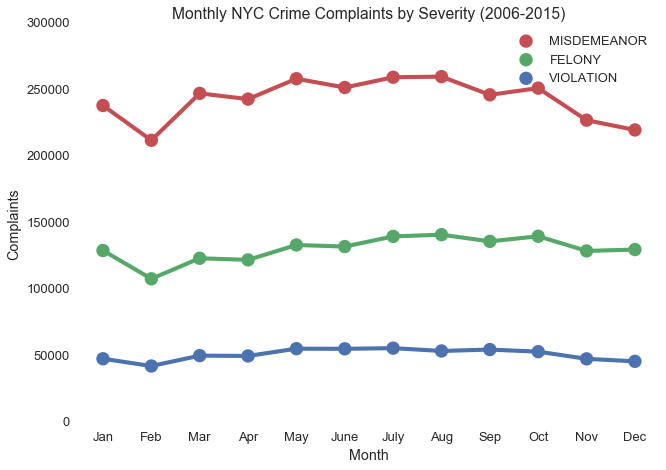

In [6]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
sns.pointplot(x="Month", y="Count", hue="Level", data=monthly_level_crime)
ax.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine(bottom=True, left=True)
ax.set_ylabel('Complaints')
plt.title('Monthly NYC Crime Complaints by Severity (2006-2015)')
plt.legend(bbox_to_anchor=(1.05, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

## Level Crime in the Last Decade

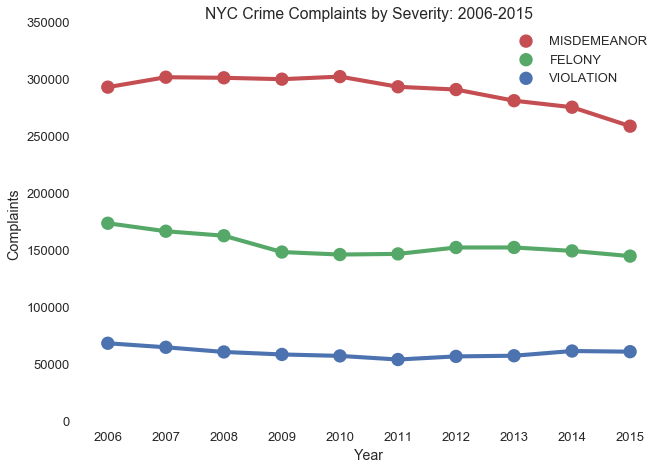

In [7]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
sns.pointplot(x="Year", y="Count", hue="Level", data=yearly_level_crime)
ax.set_xticklabels(labels=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
sns.despine(bottom=True, left=True)
ax.set_ylabel('Complaints')
plt.title('NYC Crime Complaints by Severity: 2006-2015')
plt.legend(bbox_to_anchor=(1.05, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))